###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth, C.D. Cooper. Based on [CFD Python](https://github.com/barbagroup/CFDPython), (c)2013 L.A. Barba, also under CC-BY.

# Пространство и Время

## Введение в конечно-разностные схемы для систем дифференциальных уравнений в частных производных

Добро пожаловать во второй модуль *Пространство и Время: Введение в конечно-разностные схемы для систем дифференциальных уравнений в частных производных* русской версии курса ["Practical Numerical Methods with Python"](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about). 

В первом модуле мы изучали методы численного интегрирования систем обыкновенных дифференциальных уравнений, используя в качестве иллюстрации модель фугодиного движения планера. В этом модуле мы будем изучать численное методы применительно к *системам дифференциальных уравнений в частных производных*, в которых неизвестная функция представляет собой функцией нескольких переменных. В задаче может быть не только временная переменная  $t$, но и пространственные (одна, например $x$, или несколько). Это означает, что нужно строить дискретизацию для каждой независимой переменной.

Мы начнем экскурс в численнные методы для уравнений в частных производных с одномерных задач: линейого и нелинейного уравнений переноса, уравнения диффузии и уравнения Бюргерса.

## Одномерное уравнение переноса

*Одномерное уравнение переноса* – это простейшая, наиболее общая модель, которую можно использовать для получения информации о численном решении ДУЧП. Удивительно, как много всего можно узнать из такого простого уравнения! Вот оно:

\begin{equation}\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0\end{equation}

Уравнение описывает распространение *волны* без изменения ее формы в направлении оси $x$ со скоростью $c$. Поэтому уравнение также часто называют *односторонним волновым уравнением*. 

Точное решение уравнения при начальном условии $u(x,0)=u_0(x)$ может быть записано в виде:

\begin{equation}u(x,t)=u_0(x-ct). 
\end{equation}

От пристального взгляда пытливого исследователя не скроются два свойства полученного решения:

1. его форма не изменяется – исходная волна $u_0$ просто сдвигается в $x$-направлении;
2. решение постоянно вдоль так называемых **характеритстических направлений** $x-ct=const$. Это значит, что из любой точки фазового пространства по характеристическе можно вернуться к моменту $t=0$ и определить значение решения.

![characteristics](figures/characteristics.png)
#### Характеристические кривые для положительной скорости волны.

Почему уравнение называется *линейным*?  В линейных уравенениях неизвестная функция и ее производные участвуют только в линейных членах. То есть никаких произведений, возведений в сепень и тансцедентных функций.

Какое самое важное свойство линейных уравнений? Суперпозиция решений также удовлетворяет исходному уравнению. Очень полезно!

## Метод конечных разностей

На предыдущих занятиях мы дискретизировали производные по времени, теперь у нас имеются производные как по пространству так и по времени, и это нужно учитывать при дискретизации уравнения.

Представьте график в переменных *пространство-время*, где координаты по вертикальной оси отвечают за развитие по времени (например, между моментами времени $t^n$ и $t^{n+1}$), а по горизонтальной оси – по пространству: соответствующие точки имеют координаты $x_{i-1}$, $x_i$ и $x_{i+1}$. Такой набор образует сетку, каждый узел которой имеет как пространственный так и временной индексы. На рисунке приведено графическое представление пространственно-временной сетки: 


\begin{matrix}
t^{n+1} & \rightarrow & \bullet  && \bullet  && \bullet  \\
t^n & \rightarrow & \bullet  && \bullet  && \bullet  \\
& &  x_{i-1} && x_i && x_{i+1}
\end{matrix}

Для численого решения $u(x,t)$ будем использовать нижний индекс для обозначения координаты в пространстве, например, $u_i$, в то время как верхний индекс будет обозначать момент времени, $u^n$. Тогда решение в верхней центральной точке нашей сетки будет обозначаться как $u^{n+1}_{i}$.

Каждый узел сетки, изображенной ниже, имеет индекс $i$, соответствующий пространственному положению, и увеличивающемуся при движении слева направо, и индекс $n$, обозначающий момент времени, и увеличивающийся при движенни снизу вверх. На небольшой участке сетки решение будет примать следующие значения: 

\begin{matrix}
& &\bullet & & \bullet & &  \bullet \\
& &u^{n+1}_{i-1} & & u^{n+1}_i & & u^{n+1}_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &u^n_{i-1} & & u^n_i & & u^n_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &u^{n-1}_{i-1} & & u^{n-1}_i & & u^{n-1}_{i+1} \\
\end{matrix}

Шаги приведенной выше сетки по пространству и времени постоянны и равны, соотвественно, $\Delta x$ и $\Delta t$, ее узлы и решение в них можно определить следующим образом:

\begin{eqnarray}
x_i &=& i\, \Delta x \quad \text{and} \quad t^n= n\, \Delta t \nonumber \\
u_i^n &=& u(i\, \Delta x, n\, \Delta t)
\end{eqnarray}


### Дискретизация модельного уравнения

Расмотрим дискретизацию одномерного линейного уравнения переноса по пространству и времени. По определению, частная производная по времени не влияет на изменение функции по пространству, поэтому в ее дискретном аналоге изменяются только индексы $n$. Аналогично, дискретная частная произаводная по пространству затрагивает только индексы $i$.

Представим пространственную координату $x$ в виде набора точек с индексами от $i=0$ до $N$, а изменение времени будем измерять в шагах размера $\Delta t$.

Из определения производной (опуская в нем предельный переход) известно, что при достаточно малом шаге $\Delta x$ буде верным

\begin{equation}\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}\end{equation}

Эту формулу можно записать для любой точки $x_i$. Заметим, что это не единственный способ оценки величины производной. Геометрический смысл производной $\partial u/ \partial x$ заключается в том что она яаляетсятангенсом угла наклона касательной к кривой $u(x)$. На рисунке касательная линиия к кривой $u(x)$ в точке $x_i$ обозначена как "exact." Если записать выписанную выше формулу для точки $x_i$, то будет видно, что она аппроксимирует производную, используя следующую, правую отностиельно $x_i$, точку пространственной сетки – такую аппроксимацию называют формулой _правой разности_(_forward difference_).

Но, как видно из рисунка, пространственную производную можно оценить, используя точку слева от $x_i$. Получим _левую разность_(_backward difference_). Можно даже использовать обе точки по бокам от $x_i$ и получить формулу _центральных разностей_ (правда, в этом случае в знаменателем будет $2\Delta x$).

![FDapproxiamtions](figures/FDapproxiamtions.png)
#### Три конечно-разностных аппроксимации производной в точке $x_i$.

Итого, имеется три возможных представления производной $\partial u/ \partial x$ в дискретносм виде:

* Правая разность: используются $x_i$ и $x_i + \Delta x$;
* Правая разность: используются $x_i$ и $x_i- \Delta x$;
* Центральная разность: используются две точки по разным сторонам от $x_i$.

На приведенном выше рисунке можно увидеть подсказку, что одни формулы аппроксимации могут оказаться лучше других. Например, похоже, что *центральная разность* дает наиболее близкий к касательной наклон секущей линии.  Интеренсно, так ли это на самом деле, или на рисунке преувеличивает эффект. Позже мы узнаем, как ответить на этот вопрос точнее. 

Три получившиеся формулы:

\begin{eqnarray}
\frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_i)}{\Delta x} \quad\text{Forward}\\
\frac{\partial u}{\partial x} & \approx & \frac{u(x_i)-u(x_{i-1})}{\Delta x} \quad\text{Backward}\\
\frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_{i-1})}{2\Delta x} \quad\text{Central}
\end{eqnarray}


Метод Эйлера эквивалентен схеме правых разностей. Оставим это как есть, а для пространственной производной возьмем левую разность. Тогда уравнение после дискретизации будет выглядеть следующим образом:

\begin{equation}\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0, \end{equation}

где $n$ и $n+1$ – два последовательных шага по времени, а $i-1$ и $i$ – две соседних точки на оси $x$. При заданных начальных условиях единственным неизвестным является $u_i^{n+1}$. Разрешив уравнение относительно неизвестного, получим зависимость, позволяющую шагать по времени:


\begin{equation}u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)\end{equation}

Можно изобразить часть расчетной сетки, отметив на ней узлы, которые участвуют в каждом шаге получения решения. Получим **шаблон** численной схемы. Ниже представлен шаблон численной схемы для рассматриваемого модельного уравнения, формулы для которой мы выписали.

![FTBS_stencil](figures/FTBS_stencil.png)
#### Шаблон для схемы "левый уголок".

## И вычисляем!

Ок, выпускайте питона! Первым делом, как обычно, импортируем необходимые библиотеки и задаем глобальные настройки отображения текста на графиках.

In [3]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

В качестве первого упражнения решим одномерное линейное уравнение переноса с начальным усовием в виде *квадратной волны*, которое задается следующим образом:

\begin{equation}
u(x,0)=\begin{cases}2 & \text{при } 0.5\leq x \leq 1,\\
1 & \text{в остальных случаях в интервале } (0, 2)
\end{cases}
\end{equation}

Нам также понадобятся граничные условия для $x$: пусть $u=1$ при $x=0$. Расчетная область для численного решения ограничена интервалом $x\in (0, 2)$.

![squarewave](figures/squarewave.png)
#### Начальное условие в виде квадратной волны

Теперь определим несколько переменных; нам нужно равномерно распрелить узлы расчетной сетки в гарницах расчетной области. Определяем переменную `nx` для чилса пространственных узлов сетки и переменную `dx`, в которую будет записана величина шага сетки по пространству. Кроме этого, определим величину шага по времени `dt` и число таких шагов `nt`. Волновую скорость для простоты примем равной единице, $c=1$.

In [4]:
nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2/(nx-1)
nt = 25    
dt = .02  
c = 1      #assume wavespeed of c = 1
x = numpy.linspace(0,2,nx)

Еще нужно задать начальные условия. Используем NumPy функцию `ones()` для того, чтобы задать масссив в `nx` элементов длиной, состоящий из единиц. Очень полезная функция! А теперь *изменим все элементы среза* с единицы на двойку, чтобы получилась ступенька, и выведем результат, чтобы насладиться им. Какие же элементы нам нужно изменить? По условиям задачи, те, индексы которых совпадют с индексами элемнтов массива `x`, лежащих в интервале от  $x = 0.5$ до $x = 1$.

Чтобы получить список индексов, удовлетворяющих какому-то условию, можно использовать функцию `numpy.where`.

In [5]:
u = numpy.ones(nx)      #numpy function ones()
lbound = numpy.where(x >= 0.5)
ubound = numpy.where(x <= 1)

print(lbound)
print(ubound)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]),)


Так мы получили два вектора: `lbound`, содержащий индексы для которых верно $x \geq .5$, и `ubound`, для которых $x \leq 1$. Их можно объединить при помощи функции `numpy.intersect1d`.  

In [6]:
bounds = numpy.intersect1d(lbound, ubound)
u[bounds]=2  #setting u = 2 between 0.5 and 1 as per our I.C.s
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


Напоминаю, что в Python можно объединить команды и записать все в одну строчку:

```Python
u[numpy.intersect1d(numpy.where(x >= 0.5), numpy.where(x <= 1))] = 2
```

но результат может оказаться трудночитаемым.

Давайте взглянем, какое начальное условие у нас получилось.

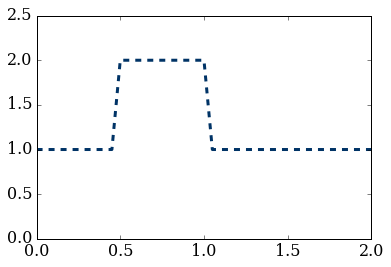

In [7]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

Получилось довольно близко к желаемому. Только вот стороны ступеньки не совсем вертикальные, не так ли? Почему так вышло?

Теперь настала пора запрограммировать дискретное уравнение, которое мы выписали для уравнения переноса согласно выбранной схеме.

Для каждого элемента массива `u` нужно выполнить следующую операцию:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Для хранения результата создадим новый (временный) массив `un`, в нем будет храниться решение $u$ на следующем шаге по времени. Повтотрим эту операцию столько раз, сколько шагов по времени мы задали, и посмотрим, как далеко убежит волна.

Сперва инициализируем вспомогательный массив `un` для хранения значений функции на $n+1$-ом шаге при помощи все той же функции `ones()`.

Дальнейший процесс можно описать как две итерационные процедуры – одна по пространству, другая по времени. Поэтому можно начать со цикла по пространственному индексу, вложенному в цикл по времени. Код для схемы конечных разностей практически совпадает с дискретным уравнением:

In [8]:
for n in range(1,nt):  
    un = u.copy() 
    for i in range(1,nx): 
    
        u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])

**Замечание** – Позже мы увидим, что написанный только что код весьма неэффективен, и что существуют лучшие способы реализации алгоритма. Всему свое время.

Сейчас давайте взглянем на график нашего решения после нескольких шагов по времени.

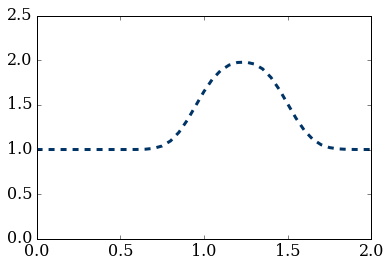

In [9]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

Забавно, исходная ступенька определенно сдвинулась вправо, но она утратила былую четкость формы! **Что же произошло?**

##### Роем вглубь

Решение отличается от квадратной супеньки, поскольку дискретное уравнение является аппроксимацией непрерывного дифференциального уравнения, которое мы изначально пытаемся решить. Как мы уже знаем, существуют погрешности. Но все равно, изменение формы первоначальной волны выглядит странным. Быть может, измельчение сетки исправит такое положение вещей? Почему бы не проверить это?

## Ошибка аппроксимации

Освежим в памяти конечно-разностную аппроксимацию, которую мы использовали для производной по пространству:

\begin{equation}\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}\end{equation}

Она была получена из определения производной в точке путем отбрасывания предела, при допущении, что шаг $\Delta x$ мал. По опыту изучения метода Эйлера, нам известно, такой подход о

We obtain it by using the definition of the derivative at a point, and simply removing the limit, in the assumption that $\Delta x$ is very small. But we already learned with Euler's method that this introduces an error, called the *truncation error*.

Using a Taylor series expansion for the spatial terms now, we see that the backward-difference scheme produces a first-order method, in space.

\begin{equation}
\frac{\partial u}{\partial x}(x_i) = \frac{u(x_i)-u(x_{i-1})}{\Delta x} + \frac{\Delta x}{2} \frac{\partial^2 u}{\partial x^2}(x_i) - \frac{\Delta x^2}{6} \frac{\partial^3 u}{\partial x^3}(x_i)+ \cdots
\end{equation}

The dominant term that is neglected in the finite-difference approximation is of $\mathcal{O}(\Delta x)$. We also see that the approximation *converges* to the exact derivative as $\Delta x \rightarrow 0$. That's good news!

In summary, the chosen "forward-time/backward space" difference scheme is first-order in both space and time: the truncation errors are $\mathcal{O}(\Delta t, \Delta x)$. We'll come back to this!

## Non-linear convection

Let's move on to the non-linear convection equation, using the same methods as before. The 1-D convection equation is:

\begin{equation}\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0\end{equation}

The only difference with the linear case is that we've replaced the constant wave speed $c$ by the variable speed $u$. The equation is non-linear because now we have a product of the solution and one of its derivatives: the product $u\,\partial u/\partial x$. This changes everything!

We're going to use the same discretization as for linear convection: forward difference in time and backward difference in space. Here is the discretized equation:

\begin{equation}\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0\end{equation}

Solving for the only unknown term, $u_i^{n+1}$, gives an equation that can be used to advance in time:

\begin{equation}u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)\end{equation}

There is very little that needs to change from the code written so far. In fact, we'll even use the same square-wave initial condition. But let's re-initialize the variable `u` with the initial values, and re-enter the numerical parameters here, for convenience (we no longer need $c$, though).

In [8]:
##problem parameters
nx = 41
dx = 2/(nx-1)
nt = 10    
dt = .02  

##initial conditions
u = numpy.ones(nx)      
u[numpy.intersect1d(lbound, ubound)]=2  



 How does it look?

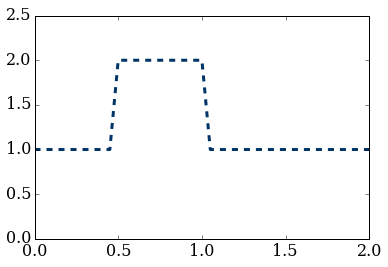

In [9]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

Changing just one line of code in the solution of linear convection, we are able to now get the non-linear solution: the line that corresponds to the discrete equation now has `un[i]` in the place where before we just had `c`. So you could write something like:
```Python
for n in range(1,nt):  
  un = u.copy() 
  for i in range(1,nx): 
    u[i] = un[i]-un[i]*dt/dx*(un[i]-un[i-1]) 
```

We're going to be more clever than that and use NumPy to update all values of the spatial grid in one fell swoop. We don't really need to write a line of code that gets executed *for each* value of $u$ on the spatial grid. Python can update them all at once! Study the code below, and compare it with the one above. Here is a helpful sketch, to illustrate the array operation—also called a "vectorized" operation—for $u_i-u_{i-1}$.

![vectorizedstencil](figures/vectorizedstencil.png)

<br>
#### Sketch to explain vectorized stencil operation.  Adapted from ["Indices point between elements"](https://blog.nelhage.com/2015/08/indices-point-between-elements/) by Nelson Elhage.  

In [10]:
for n in range(1, nt):  
    un = u.copy() 
    u[1:] = un[1:]-un[1:]*dt/dx*(un[1:]-un[0:-1]) 
    u[0] = 1.0

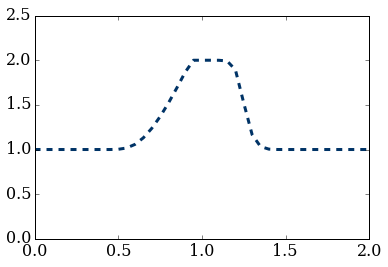

In [11]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

Hmm. That's quite interesting: like in the linear case, we see that we have lost the sharp sides of our initial square wave, but there's more. Now, the wave has also lost symmetry! It seems to be lagging on the rear side, while the front of the wave is steepening. Is this another form of numerical error, do you ask? No! It's physics!

##### Dig deeper

Think about the effect of having replaced the constant wave speed $c$ by the variable speed given by the solution $u$. It means that different parts of the wave move at different speeds. Make a sketch of an initial wave and think about where the speed is higher and where it is lower ...

## References

* Elhage, Nelson (2015), ["Indices point between elements"](https://blog.nelhage.com/2015/08/indices-point-between-elements/)

---

###### The cell below loads the style of the notebook.

In [2]:
#from IPython.core.display import HTML
#css_file = '../../styles/numericalmoocstyle.css'
#HTML(open(css_file, "r").read())